# Segmentação de imagens de balão e celular que estão armazenadas no GitHub.

## 1. Configurações iniciais, importação e organização das imagens que serão usadas para o treinamento

### 1.1. Instalação das bibliotecas

Algumas bibliotecas precisam ser reinstaladas com versões específicas para o funcionamento de todo o código

In [ ]:
VARIAVEL = True

if VARIAVEL:

  !pip install numpy==1.23

  # caso encontre algum erro na hora do treinamento,
  # execute os dois comandos abaixo antes do "import tensorflow" (se ja realizou o import, precisa reiniciar a sessão)
  !pip install tensorflow==2.15.0 # 2.9.2
  !pip install tensorflow-gpu==2.15.0 # 2.9.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 38.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numpy: filename=numpy-1.23.0-cp311-cp311-linux_x86_64.whl size=19730294 sha256=21d44f1f9ff62efef8ef12eb7b20d2df392496dccea343ad049f66ad40048af4
  Stored in directory: /root/.cache/pip/wheels/6d/36/1a/3ec6b85008bea3151efb003f5d41baa7bf4966cb43c1c2470b
Successfully built numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.0 which is incompatible.
ibis-framework 9.2.0 requires numpy<3,>=1.23.2, but you have numpy 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
  Attempting uninstall: keras
    Found existing installation: keras

### 1.2. Importação das bibliotecas

In [ ]:
# Interage com o sistema operacional, como manipular arquivos e diretórios.
import os
import sys

# Criação de strings em base64
import base64

# Tratamento de imagens
from PIL import Image, ImageOps

# Geração de números aleatórios
import random

# Funções matemáticas
import math

# Extração de conteúdos em textos
import re

# Apresentação do progresso do código
from tqdm import tqdm

# Contagem de tempo
import time

# Divisão entre dados de treino e de validação
from sklearn.model_selection import train_test_split

# Realiza computação numérica eficiente com arrays multidimensionais e funções matemáticas avançadas.
import numpy as np

# Manipulações e tratamentos de imagens
import cv2

# Geração de gráficos
import matplotlib.pyplot as plt

# Manipulações e tratamentos de arquivos json
import json

# Tratamento e manipulações de dataframes
import pandas as pd

import skimage.draw
from skimage.io import imread
#import skimage

# Criação de redes neurais
import tensorflow

# Manipulação de arquivos e pastas no sistema
import shutil

# Para ter acesso ao Google Drive
from google.colab import drive

In [ ]:
import PIL
import matplotlib as plt
import tqdm
import skimage
import pandas as pd
import cv2
import sklearn

# Apresenta a versão do tensorflow
print('A versão do numpy é:', PIL.__version__)
print('A versão do matplot é:', plt.__version__)
print('A versão do tqdm é:', tqdm.__version__)
print('A versão do skimage é:', skimage.__version__)
print('A versão do pandas é:', pd.__version__)
print('A versão do cv2 é:', cv2.__version__)
print('A versão do sklearn é:', sklearn.__version__)

A versão do numpy é: 11.1.0
A versão do matplot é: 3.10.0
A versão do tqdm é: 4.67.1
A versão do skimage é: 0.25.2
A versão do pandas é: 2.2.2
A versão do cv2 é: 4.11.0
A versão do sklearn é: 1.6.1


### 1.3. Configurações básicas

In [ ]:
# Apresenta a versão do tensorflow
print('A versão do numpy é:', np.__version__)
print('A versão do tensorflow é:', tensorflow.__version__)

# Deleta a pasta sample_data (Pasta padrão com alguns arquivos de teste do Google Colab)
!rm -rf sample_data/ classes_selecionadas/ Mask_RCNN-TF2/

# Monta a pasta no Google Colab que será integrada ao Google Drive
drive.mount('/content/driver')

# Caminho para uma pasta específica do Google Drive já convertida para comandos Linux
caminho_drive = "/content/driver/MyDrive/Colab Notebooks/Cargill - Visão Computacional/Imagens para segmentação"
caminho_drive = caminho_drive.replace(" ", "\ ")

# Define o caminho com a pasta 'Mask_RCNN-TF2'
path_raiz = os.path.abspath('/content/Mask_RCNN-TF2')

A versão do numpy é: 1.26.4
A versão do tensorflow é: 2.15.0
Mounted at /content/driver


### 1.4. Funções auxiliares

In [ ]:
def mostrar(img: str) -> None:

  """
  Apresenta uma imagem na célula de notebook com base em seu diretório.

  Args:
    img (str): Diretório da imagem.
  """

  fig = plt.gcf()
  fig.set_size_inches(16, 10)
  plt.axis("off")
  plt.imshow(img)
  plt.show()

In [ ]:
def github_to_raw(link: str) -> str:

    """
    Converte um link normal do GitHub para o formato Raw Content.

    Args:
        link (str): Link normal do GitHub.

    Returns:
        str: Link no formato Raw Content.
    """

    if "github.com" not in link or "/blob/" not in link:
        raise ValueError("O link fornecido não é válido ou não contém '/blob/'.")

    # Substituir o domínio e remover 'blob'
    raw_link = link.replace("https://github.com", "https://raw.githubusercontent.com")
    raw_link = raw_link.replace("/blob/", "/")

    return raw_link

In [ ]:
def combine_base64_and_restore(df, output_directory) -> None:

    """
    Converte o dataframe que contém as strings em base64 para o arquivo original.
    """

    # Cria a pasta de saída caso não exista
    os.makedirs(output_directory, exist_ok=True)

    # Agrupa as linhas do dataframe pelo diretório e reconstrói os arquivos
    for dir_name, group in df.groupby('diretorio'):
        # Junta as partes da base64
        combined_base64 = ''.join(group['base64_string'])

        # Converte de base64 para binário
        file_data = base64.b64decode(combined_base64)

        # Determina o nome do arquivo a ser restaurado
        # Extrai o nome do arquivo a partir do diretório (considera o nome da pasta)
        base_name = os.path.basename(dir_name)

        # Salva o arquivo restaurado no diretório de saída
        with open(os.path.join(output_directory, base_name), "wb") as file:
            file.write(file_data)

In [ ]:
def read_and_concat_parquets(folder_path: str) -> pd.DataFrame:

    """
    Lê todos os arquivos .parquet de uma pasta e concatena em um único dataframe.

    Args:
        folder_path (str): Caminho para a pasta contendo os arquivos .parquet.

    Returns:
        pd.DataFrame: Dataframe concatenado com os dados de todos os arquivos .parquet.
    """

    # Lista todos os arquivos na pasta especificada
    all_files = os.listdir(folder_path)

    # Filtra os arquivos .parquet
    parquet_files = [f for f in all_files if f.endswith('.parquet')]

    # Ordena os arquivos para garantir a ordem
    parquet_files.sort()

    # Caminho completo para cada arquivo
    parquet_paths = [os.path.join(folder_path, f) for f in parquet_files]

    # Lê e concatena os dataframes
    dataframes = [pd.read_parquet(file) for file in parquet_paths]
    concatenated_df = pd.concat(dataframes, ignore_index=True)

    return concatenated_df

In [ ]:
def github_para_colab(links_github: list, pasta_saida: int) -> None:

  """
  Baixa o conteúdo dos links do GitHub para o Google Colab
  """

  # Deleta a pasta de saída caso ela já exista
  if os.path.exists(pasta_saida): shutil.rmtree(pasta_saida)

  # Cria a pasta
  os.mkdir(pasta_saida)

  # Converte eles para um foramto baixável
  links_github = list(map(github_to_raw, links_github))

  # Percorre todos os dataframes
  for link in links_github:

    # Define o caminho onde o arquivo será baixado, além do nome do próprio arquivo
    caminho_destino = os.path.join(pasta_saida, os.path.split(link)[1])

    # Cria o comando de baixar o arquivo do repositório do GitHub
    comando = f"wget -O {caminho_destino} {link}"

    # Executa o comando de baixar o arquivo do repositório do GitHub
    !{comando}

In [ ]:
def merge_ordered_dataframes(input_folder: str, output_file: str = 'df_unificado.parquet') -> None:

    """
    Combina e organiza dataframes armazenados em arquivos .parquet em uma pasta,
    salvando o resultado em um único arquivo.

    Parâmetros:
    - input_folder (str): Diretório contendo os arquivos .parquet dos dataframes.
    - output_file (str): Caminho e nome do arquivo .parquet de saída.
    """

    # Lista todos os arquivos na pasta
    files = [f for f in os.listdir(input_folder) if f.endswith('.parquet')]

    if not files:
        raise FileNotFoundError(f"Nenhum arquivo .parquet encontrado na pasta {input_folder}.")

    # Ordena os arquivos com base no número extraído do nome
    files_sorted = sorted(files, key=lambda x: int(x.split('_')[-1].replace('.parquet', '')))

    # Cria uma lista para armazenar os dataframes
    dataframes = []

    # Carrega os dataframes na ordem correta
    for file in files_sorted:
        file_path = os.path.join(input_folder, file)
        df = pd.read_parquet(file_path)
        dataframes.append(df)

    # Concatena todos os dataframes em um único
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Salva o dataframe único no arquivo de saída
    combined_df.to_parquet(output_file)

In [ ]:
def corrigir_e_exibir(diretorio_imagem: str, exibir_imagem: bool = True) -> None:

    """
    Recebe o diretório de uma imagem, corrige a sua orientação, salva ela no lugar
    da original, e apresenta a imagem.
    """

    if os.path.exists(diretorio_imagem):  # Verifica se o arquivo existe
        # Corrigir a orientação com base nos metadados
        img = Image.open(diretorio_imagem)
        img_corrigida = ImageOps.exif_transpose(img)

        # Substituir o arquivo original pelo corrigido
        img_corrigida.save(diretorio_imagem)

        # Exibir a imagem caso o usuário tenha definido
        if exibir_imagem:
          plt.imshow(img_corrigida)
          plt.axis('off')
          plt.show()
    else:
        print(f"Arquivo não encontrado: {diretorio_imagem}")

## 2. Importação do Mask-RCNN e carregamento do conjunto de dados

### 2.1. Download do repositório e instalação do Mask-RCNN

In [ ]:
# Download do repositório
!git clone https://github.com/alsombra/Mask_RCNN-TF2

Cloning into 'Mask_RCNN-TF2'...
remote: Enumerating objects: 1004, done.
remote: Total 1004 (delta 0), reused 0 (delta 0), pack-reused 1004 (from 1)
Receiving objects: 100% (1004/1004), 137.72 MiB | 30.30 MiB/s, done.
Resolving deltas: 100% (588/588), done.


In [ ]:
# Entra na pasta 'Mask_RCNN-TF2/'
%cd Mask_RCNN-TF2/

/content/Mask_RCNN-TF2


In [ ]:
# Instala as bibliotecas necessárias
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00


In [ ]:
# Instala o MR-CNN
!python setup.py install

/content/Mask_RCNN-TF2/setup.py:9: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:452: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:452: Setu

### 2.2. Importação das bibliotecas do Mask-RCNN

In [ ]:
# Importa as bibliotecas do MR-CNN
from mrcnn.config import Config
import mrcnn.utils as utils
from mrcnn import visualize
import mrcnn.model as modellib
from mrcnn.model import log

### 2.3. Criação da classe

In [ ]:
# # ESSA FUNÇÃO CONSIDERA CADA OBJETO DENTRO DE UMA IMAGEM

# class DatasetPersonalizado(utils.Dataset):

#     def load_object(self, dataset_dir, subset, nome_annotation="via_region_data.json"):
#         """Carrega um subconjunto do dataset Balloon.
#         dataset_dir: Diretorio raíz do dataset.
#         subset: Subconjunto a ser carregado: train (treinamento) ou val (validação)
#         """

#         #==================================================================================================================================================

#         # Adiciona as classes com seus respectivos IDs
#         # self.add_class("objetos", 1, "Balloon")
#         # self.add_class("objetos", 2, "Mobile phone")
#         # self.add_class("objetos", 3, "Ruler")

#         # dicionario_classe_id = {"Balloon": 1, "Mobile phone": 2, "Ruler": 3}
#         # dicionario_id_classe = {valor: chave for chave, valor in dicionario_classe_id.items()}

#         self.add_class("objetos", 1, "Mobile phone")

#         dicionario_classe_id = {"Mobile phone": 1}
#         dicionario_id_classe = {valor: chave for chave, valor in dicionario_classe_id.items()}

#         #==================================================================================================================================================

#         # Escolhe se é o dataset de Treinamento ou Validação
#         assert subset in ["train", "val"]
#         dataset_dir = os.path.join(dataset_dir, subset)

#         annotations = json.load(open(os.path.join(dataset_dir, nome_annotation)))
#         annotations = list(annotations.values())  # não precisa das dict keys

#         # A ferramenta VIA salva as imagens em JSON mesmo que elas não contenham nenhuma anotação. Então, pulamos as imagens não anotadas.
#         annotations = [a for a in annotations if a['regions']]

#         contagem = 0
#         # Adiciona as imagens
#         for a in annotations:
#             # Pega as coordenadas x e y dos pontos dos poligonos que formam o contorno de cada instância do objeto.
#             # Eles são armazenadas em shape_attributes (para visualizar, abra o arquivo json)
#             # A condição if é necessária para que o código suporte anotações geradas pelas versões 1.x e 2.x da VIA.
#             if type(a['regions']) is dict:
#                 polygons = [r['shape_attributes'] for r in a['regions'].values()]

#             # Caso seja uma lista
#             else:
#                 polygons = [r['shape_attributes'] for r in a['regions']]
#                 classe = [dicionario_classe_id[r['region_attributes']['label']] for r in a['regions']]

#             # A função load_mask() vai precisar do tamanho da imagem para que possa converter os polígonos em mascaras.
#             # Infelizmente, o VIA não inclui isso no JSON, então devemos ler a imagem manualmente e gerar essas máscaras.
#             image_path = os.path.join(dataset_dir, a['filename'])
#             image = skimage.io.imread(image_path)
#             height, width = image.shape[:2]
#             contagem = contagem+1

#             self.add_image("objetos",
#                 image_id=a['filename'],  # usa o nome do arquivo como id unico da imagem
#                 path=image_path,
#                 classe = classe,
#                 width=width, height=height,
#                 polygons=polygons)

#         print("Imagens "+subset+": " + str(contagem))

#     def load_mask(self, image_id):
#         """Gera as mascaras das instâncias para a imagem.
#        Returna:
#         masks: Uma array booleana de formato/shape [height, width, instance count] com 1 mascara por instancia.
#         class_ids: uma array de 1D contendo os IDs das mascaras das instancias.
#         """
#         # Se não for uma imagem de conjunto de dados do balão (balloon dataset), delegue à classe ascendente.
#         image_info = self.image_info[image_id]
#         #print(image_info)
#         if image_info["source"] != "objetos":
#             return super(self.__class__, self).load_mask(image_id)

#         # Converte os poligonos em uma mascara bitmap com shape  [height, width, instance_count]
#         info = self.image_info[image_id]
#         mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
#                         dtype=np.uint8)

#         # Agora será calculado a máscara da instância. para cada pixel da imagem, classificará como pertencente à classe ou não
#         for i, p in enumerate(info["polygons"]):
#             # Pega os indices dos pixels dentro dos poligonos e define eles como = 1 (cor branca), caso contrário continuará valor 0 (cor preta)
#             rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'], mask.shape) # passamos o .shape também como 3ª parâmetro para evitar possíveis erros

#             mask[rr, cc, i] = 1

#         # Retorna a mascara e a array dos IDs das classes de cada instancia.
#         # Como nesse exemplo temos uma classe apenas, retornamos uma array composta de 1s
#         # return mask.astype(bool), np.ones([mask.shape[-1]], dtype=np.int32)
#         return mask.astype(bool), (np.array(info['classe'], dtype=np.int32)).ravel()

#     def image_reference(self, image_id):
#         """Retorna o caminho da imagem."""
#         info = self.image_info[image_id]
#         if info["source"] == "objetos":
#             return info["path"]
#         else:
#             super(self.__class__, self).image_reference(image_id)

## 3. Configuração do modelo

### 3.1. Atualização de compatibilidade

In [ ]:
# Execute as 5 linhas abaixo para que não tenhamos problemas ao executar com as versões mais recentes do Tensorflow
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### 3.2. Configurações da rede neural

In [ ]:
class ConfigRede(Config):

  # balloon_phone_ruler
  NAME = 'phone'

  # 2
  IMAGES_PER_GPU = 2

  # 1 + (quantidade de classes), visto que o fundo da imagem também será considerado
  NUM_CLASSES = 1 + 1

  # Quantidade de imagens totais de treinamento
  # quantidade_imagens_train = len(lista_image_path_train)
  quantidade_imagens_train = 800
  STEPS_PER_EPOCH = (quantidade_imagens_train // IMAGES_PER_GPU) # (Quantidade de imagens) / IMAGES_PER_GPU = 5272 / 2 = 1318
  DETECTION_MIN_CONFIDENCE = 0.9
  USE_MINI_MASK = False

  # Recomendado deixar o tamanho 512 para execuções no Colab
  IMAGE_MIN_DIM = 512 # 512
  IMAGE_MAX_DIM = 512 # 512

  # Quantidade de imagens totais de validação
  # quantidade_imagens_val = len(lista_image_path_val)
  quantidade_imagens_val = 200
  VALIDATION_STEPS = (quantidade_imagens_val // IMAGES_PER_GPU) # 5 # (Quantidade de imagens) / IMAGES_PER_GPU = 1810 / 2 = 452

### 3.3. Configurações da rede neural para inferência

In [ ]:
class InferenceConfig(ConfigRede):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

### 3.4. Criação de funções auxiliares

In [ ]:
def carrega_modelo_teste(model_path: str):

  """
  Retorna um modelo e suas configurações com base nos pesos referenciados.
  """

  inference_config = InferenceConfig()
  model = modellib.MaskRCNN(mode = 'inference', config = inference_config, model_dir = model_path)
  model.load_weights(model_path, by_name = True)
  return model, inference_config

In [ ]:
def segmentar_imagem(model, img, tipo_modelo):

  resultados = model.detect([img], verbose=0)
  r = resultados[0]

  # Define as classes que serão segmentadas
  lista_classes = ['Background']
  lista_classes.extend(tipo_modelo)

  #===============================================================================================================================

  visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], lista_classes, r['scores'], figsize=(12,10))

  return r

## 4. Transferência dos pesos do modelo já treinados do GitHub

### 4.1. Retorna o Python para a raíz do Google Colab

In [ ]:
# Caso o Python não esteja na raíz do Google Colab
if os.getcwd() != '/content':

  # Volta para a pasta principal do Google Colab
  %cd ..

  # Apresenta a pasta atual
  print(os.getcwd())

/content
/content


### 4.2. Importação da branch principal e apresenta todas as branchs

In [ ]:
# Link do repositório do GitHub
link_github = 'https://github.com/AriBarrosFilho/Pesos_Segmentation_Balloon_Phone.git'

# Pasta do Google Colab que receberá o conteúdo do repositório (A pasta será criada caso não exista)
pasta_destino = 'pesos_treinados'

#===============================================================================

# Caso a pasta exista, deleta ela
if os.path.exists(pasta_destino): shutil.rmtree(pasta_destino)

# Cria o comando de clonar a branch main do repositório para uma pasta do Google Colab
comando = f"git clone --single-branch --branch main {link_github} {pasta_destino}"

# Executa o comando de clonar a branch main do repositório para uma pasta do Google Colab
!{comando}

#-----------------------------------------------------------------------------------------------------------------------------------

# Obtém o texto do arquivo "nome_das_branches.txt"
with open(os.path.join(pasta_destino, "nome_das_branchs.txt")) as f:
  conteudo = f.read()

# Cria uma lista com o nome das branches
lista_branches = conteudo.splitlines()

# Destaca as branches que serão apresentada abaixo
print("\n", "-" * 100, "\n")

# Apresenta todas as branches do repositório
for i, branch in enumerate(lista_branches): print(i, branch)

Cloning into 'pesos_treinados'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (12/12), done.

 ---------------------------------------------------------------------------------------------------- 

0 Balloon_1000_45
1 Phone_1000_30
2 BalloonPhone_666_5
3 Phone_333_5
4 Balloon_666_5


### 4.3. Importação de branches específicas (Que contém pesos específicos)

In [ ]:
# Define quais branches serão importadas através de suas posições na lista
branches = [3, 4]

#===============================================================================

for branch in branches:

  # Pasta do Google Colab que receberá o conteúdo do repositório
  pasta_destino_branch = os.path.join(pasta_destino, lista_branches[branch])

  # Caso a pasta exista, deleta ela
  if os.path.exists(pasta_destino_branch): shutil.rmtree(pasta_destino_branch)

  # Cria o comando de clonar a branch main do repositório para uma pasta do Google Colab
  comando = f"git clone --branch {lista_branches[branch]} --single-branch {link_github} {pasta_destino_branch}"

  # Executa o comando de clonar a branch main do repositório para uma pasta do Google Colab
  !{comando}

Cloning into 'pesos_treinados/Phone_333_5'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 18 (from 1)
Receiving objects: 100% (20/20), 243.07 MiB | 16.73 MiB/s, done.
Updating files: 100% (9/9), done.
Cloning into 'pesos_treinados/Balloon_666_5'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 23 (delta 0), reused 0 (delta 0), pack-reused 21 (from 2)
Receiving objects: 100% (23/23), 243.07 MiB | 29.38 MiB/s, done.
Updating files: 100% (9/9), done.


### 4.4. Recria os arquivos originais dos pesos com base nos dataframes

In [ ]:
for branch in tqdm(branches):

  # Pasta do Google Colab que receberá o conteúdo do repositório
  pasta_destino_branch = os.path.join(pasta_destino, lista_branches[branch])

  # Cria o caminho absoluto de onde estão os dataframes com strings em base64
  caminho_completo = os.path.abspath(os.path.join(pasta_destino_branch, lista_branches[branch]))

  #===============================================================================

  # Junta e concatena em um único dataframe todos os dataframes
  df_base64 = read_and_concat_parquets(caminho_completo)

  # Com base em um dataframe com strings em base64, converte o arquivo para o seu formato original
  combine_base64_and_restore(df = df_base64, output_directory = pasta_destino_branch)

100%|██████████| 2/2 [00:08<00:00,  4.08s/it]


### 4.5. Obtém o caminho completo de todos os pesos

In [ ]:
# Lista que conterá o caminho absoluto de todos os arquivos possuem a extensão .h5, dentro de uma pasta
lista_caminho_pesos = []

# Percorre toda a pasta e suas subpastas
for caminho, _, arquivos in os.walk(pasta_destino):
  for arquivo in arquivos:

    # Adiciona o caminho absoluto de todos os arquivos na lista
    lista_caminho_pesos.append(os.path.abspath(os.path.join(caminho, arquivo)))

# Realiza uma filtragem para apenas arquivos que possuem a extensão .h5
lista_caminho_pesos = list(filter(lambda arquivo: arquivo.endswith('.h5'), lista_caminho_pesos))

# Aviso ao usuário
print('Abaixo está os caminhos dos pesos disponíveis, selecione o que você deseja.', '\n', '-' * 100, '\n')

# Apresenta o caminho completo para cada peso importado.
for caminho in lista_caminho_pesos: print(caminho)

Abaixo está os caminhos dos pesos disponíveis, selecione o que você deseja. 
 ---------------------------------------------------------------------------------------------------- 

/content/pesos_treinados/Phone_333_5/mask_rcnn_phone_0005.h5
/content/pesos_treinados/Balloon_666_5/mask_rcnn_balloon_0005.h5


### 4.6. Carregamento da rede neural

#### 4.6.1 Modelo do Celular

In [ ]:
# caminho = "/content/driver/MyDrive/Colab Notebooks/Cargill - Visão Computacional/aprendizado_maquina/segmentation_Mobile_Phone_Max/mask_rcnn_mobilephone_0017.h5".replace(" ", "\ ")
# comando = f"cp {caminho} ./phone.h5"
# !{comando}

# model_phone, inference_config_phone = carrega_modelo_teste(model_path = "/content/phone.h5")

In [ ]:
# Caminho onde estão os pesos treinados
caminho_pesos_treinados = "/content/pesos_treinados/Phone_333_5/mask_rcnn_phone_0005.h5"

model_phone, inference_config_phone = carrega_modelo_teste(model_path = caminho_pesos_treinados)

# Tenta carregar o modelo
try:

  # Carrega o modelo com base nos pesos importados
  model_phone, inference_config_phone = carrega_modelo_teste(model_path = caminho_pesos_treinados)

# Caso não seja possível carregar o modelo
except:

  # Alerta ao usuário de que houve um problema
  print("DEU ALGO ERRADO, REVEJA AS CONFIGURAÇÕES DA QUANTIDADE DE CLASSES NA SEÇÃO 3.2.")
  model_phone, inference_config_phone = (0, 0)

Instructions for updating:
Use fn_output_signature instead


#### 4.6.2. Modelo da Bexiga

In [ ]:
# Caminho onde estão os pesos treinados
caminho_pesos_treinados = "/content/pesos_treinados/Balloon_666_5/mask_rcnn_balloon_0005.h5"

# Tenta carregar o modelo
try:

  # Carrega o modelo com base nos pesos importados
  model_balloon, inference_config_balloon = carrega_modelo_teste(model_path = caminho_pesos_treinados)

# Caso não seja possível carregar o modelo
except:

  # Alerta ao usuário de que houve um problema
  print("DEU ALGO ERRADO, REVEJA AS CONFIGURAÇÕES DA QUANTIDADE DE CLASSES NA SEÇÃO 3.2.")
  model_balloon, inference_config_balloon = (0, 0)

#### 4.6.3. Modelo da Bexiga e do Celular

In [ ]:
# Caminho onde estão os pesos treinados
caminho_pesos_treinados = "/content/pesos_treinados/BalloonPhone_666_5/mask_rcnn_phone_0005.h5"

try:

  # Carrega o modelo com base nos pesos importados
  model_balloon_phone, inference_config_balloon_phone = carrega_modelo_teste(model_path = caminho_pesos_treinados)

except:
  print("DEU ALGO ERRADO, REVEJA AS CONFIGURAÇÕES DA QUANTIDADE DE CLASSES NA SEÇÃO 3.2.")
  model_balloon_phone, inference_config_balloon_phone = (0,0)

DEU ALGO ERRADO, REVEJA AS CONFIGURAÇÕES DA QUANTIDADE DE CLASSES NA SEÇÃO 3.2.


#### 4.6.4. Criação do dicionário selecionador de modelos de classes

In [ ]:
# Dicionário que conterá o modelo e o nome das classes para a segmentação
modelo_classe = {'balloon': (model_balloon, ['Bexiga']), 'phone': (model_phone, ["Celular"]), 'balloon_phone': (model_balloon_phone, ['Bexiga', 'Celular'])}
id_classe = {'1': 'Bexiga', '2': 'Celular'}

## 5. Importação das imagens

### 5.1. Importação da branch main do repositório

In [ ]:
# Link do repositório do GitHub
link_github = 'https://github.com/AriBarrosFilho/Imagens_Bexiga_Celular.git'

# Pasta do Google Colab que receberá o conteúdo do repositório (A pasta será criada caso não exista)
pasta_destino = 'imagens'

#===============================================================================

# Caso a pasta exista, deleta ela
if os.path.exists(pasta_destino): shutil.rmtree(pasta_destino)

# Cria o comando de clonar a branch main do repositório para uma pasta do Google Colab
comando = f"git clone --single-branch --branch main {link_github} {pasta_destino}"

# Executa o comando de clonar a branch main do repositório para uma pasta do Google Colab
!{comando}

#-------------------------------------------------------------------------------------------

# Obtém o texto do arquivo "nome_das_branches.txt"
with open(os.path.join(pasta_destino, "nome_das_branchs.txt")) as f:
  conteudo = f.read()

# Cria uma lista com o nome das branches
lista_branches = conteudo.splitlines()

# Destaca as branches que serão apresentada abaixo
print("\n", "-" * 100)

# Apresenta a quantidade de branches (Cada branch representa uma bexiga com um peso diferente)
print("A quantidade de branches (pacotes de imagens) é:", len(lista_branches))

Cloning into 'imagens'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 1), reused 1 (delta 1), pack-reused 5 (from 2)
Receiving objects: 100% (9/9), done.
Resolving deltas: 100% (1/1), done.

 ----------------------------------------------------------------------------------------------------
A quantidade de branches (pacotes de imagens) é: 30


### 5.2. Importação de branches específicas

In [ ]:
# Define quantos pacotes de imagens serão baixados
quantidade_pacotes = 5 # 30

#========================================================================================================

# Caso a quantidade de pacotes esteja dentro da faixa permitida
if quantidade_pacotes <= len(lista_branches):

  # Retorna os elementos da lista de branches de forma aleatória
  lista_pacotes = random.sample(lista_branches, k = quantidade_pacotes)

  # Obtém o momento inicial antes da importação das imagens
  tempo_inicial = time.time()

  # Percorre todas as branches selecionadas
  for branch in lista_pacotes:

    # Pasta do Google Colab que receberá o conteúdo do repositório (A pasta será criada caso não exista)
    pasta_destino_branch = os.path.join(pasta_destino, branch)

    # Cria o comando de clonar a branch main do repositório para uma pasta do Google Colab
    comando = f"git clone --branch {branch} --single-branch {link_github} {pasta_destino_branch}"

    # Executa o comando de clonar a branch main do repositório para uma pasta do Google Colab
    !{comando}

# Obtém o tempo total em minutos para a importação das imagens
tempo_total = round((time.time() - tempo_inicial) / 60, 2)

# Obtém a quantidade média em segundos para a importação de um pacote de imagens
pacotes_por_segundo = round((time.time() - tempo_inicial) / len(lista_pacotes), 1)

# Destaca as branches que serão apresentada abaixo
print("\n", "-" * 100, "\n")

# Apresenta ao usuário o tempo necessário para a importação das imagens
print(f"Demorou {tempo_total} minutos, {pacotes_por_segundo} segundos por pacote")

Cloning into 'imagens/11_808'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (13/13), 44.42 MiB | 28.41 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Cloning into 'imagens/28_1688'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 13 (from 1)
Receiving objects: 100% (16/16), 72.25 MiB | 23.97 MiB/s, done.
Cloning into 'imagens/18_1170'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14 (delta 1), reused 0 (delta 0), pack-reused 11 (from 1)
Receiving objects: 100% (14/14), 57.45 MiB | 21.39 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Cloning into 'imagens/14_1262

### 5.3. Cria o dataframe com os dados das imagens

In [ ]:
# Lista que armazenará o caminho completo das imagens válidas
lista_caminho_arquivos = []

# Percorre todas as pastas e subpastas
for caminho, _, arquivos in os.walk(pasta_destino):
  for arquivo in arquivos:

    # Acrescenta na lista o caminho completo de todos os arquivos
    lista_caminho_arquivos.append(os.path.abspath(os.path.join(caminho, arquivo)))

# Filtra os arquivos que possuem a extensão .jpg
lista_caminho_arquivos = list(filter(lambda x: x.endswith('.jpg') and ('balança' not in x), lista_caminho_arquivos))

# Ordena a lista de acordo com o ID da bexiga
lista_caminho_arquivos = sorted(lista_caminho_arquivos, key = lambda x: int(x.split('/')[-2].split('_')[0]))

# Lista que armazenará o nome da imagens
lista_imagens = list(map(lambda x: os.path.basename(x), lista_caminho_arquivos))

# Lista que armazenará o ID da bexiga nas imagens
lista_id = list(map(lambda x: int(x.split('/')[-2].split('_')[0]), lista_caminho_arquivos))

# Lista que armazenará o peso da bexiga nas imagens
lista_pesos = list(map(lambda x: int(x.split('/')[-2].split('_')[1]), lista_caminho_arquivos))

# Dicionário que conterá os dados das imagens
dicionario_dados = {'caminho': lista_caminho_arquivos, 'imagem': lista_imagens, 'id': lista_id, 'gramas': lista_pesos}

# Cria um dataframe com os dados das imagens
df_imagens = pd.DataFrame(dicionario_dados)

# Apresenta o dataframe
display(df_imagens)

,caminho,imagem,id,gramas
0,/content/imagens/11_808/11_808/20241201_223948...,20241201_223948.jpg,11,808
1,/content/imagens/11_808/11_808/20241201_224004...,20241201_224004.jpg,11,808
2,/content/imagens/11_808/11_808/20241201_223959...,20241201_223959.jpg,11,808
3,/content/imagens/11_808/11_808/20241201_223955...,20241201_223955.jpg,11,808
4,/content/imagens/12_773/12_773/20241201_230000...,20241201_230000.jpg,12,773
5,/content/imagens/12_773/12_773/20241201_225954...,20241201_225954.jpg,12,773
6,/content/imagens/12_773/12_773/20241201_225958...,20241201_225958.jpg,12,773
7,/content/imagens/12_773/12_773/20241201_225950...,20241201_225950.jpg,12,773
8,/content/imagens/12_773/12_773/20241201_230004...,20241201_230004.jpg,12,773
9,/content/imagens/12_773/12_773/20241201_225946...,20241201_225946.jpg,12,773


### 5.4. Corrige a orientação de todas as imagens

In [ ]:
# Percorre todas as imagens
for imagem in tqdm(lista_caminho_arquivos):

  # Corrige a orientação da imagem e salva ela no lugar da original
  corrigir_e_exibir(imagem, exibir_imagem = False)

100%|██████████| 27/27 [00:14<00:00,  1.88it/s]


## 6. Segmentação das imagens

### 6.1. Visualização da segmentação de uma imagem

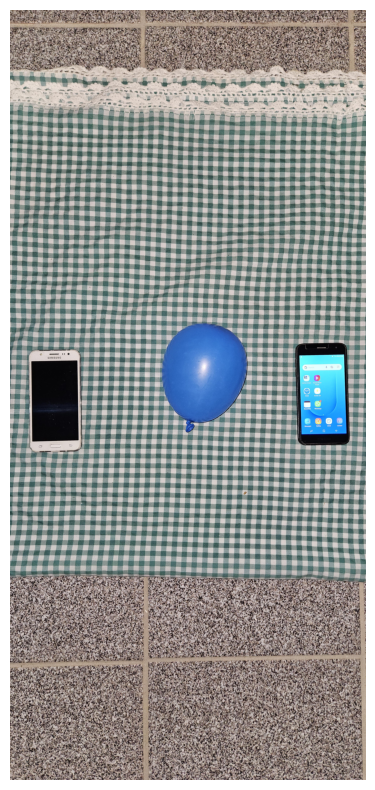

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/content/Mask_RCNN-TF2/mrcnn/utils.py:571: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.where(mask >= threshold, 1, 0).astype(np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
# Índice da imagem
indice = 5

# Define se a imagem original (sem segmentações) será apresentada também
APRESENTAR_IMAGEM_ORIGINAL = True

#===============================================================================

# Seleciona a linha do dataframe referente ao seu índice
df_imagem_especifica = df_imagens.iloc[indice]

# Define a imagem com base em seu caminho
img_teste = imread(df_imagem_especifica['caminho'])

if APRESENTAR_IMAGEM_ORIGINAL:

  # Mostra a imagem original
  mostrar(img_teste)

# Apresenta a imagem com a segmentação
# tipo_modelo: 'balloon', 'phone' ou 'balloon_phone'
tipo = "phone"
r = segmentar_imagem(model = modelo_classe[tipo][0], img = img_teste, tipo_modelo = modelo_classe[tipo][1])

### 6.2. Realiza a segmentação para todas as imagens (Considerando um modelo individual)

#### 6.3.2. Extrai os dados de cada imagem, como o número de objetos segmentados e seus pixels

In [ ]:
# Define o modelo que realizará a segumentação
# tipo_modelo: 'balloon', 'phone' ou 'balloon_phone'
tipo = "balloon"

#===============================================================================

# Seleciona o modelo que realizará a segumentação
model = modelo_classe[tipo][0]

# Lista que armazenará a quantidade de segmentações, e a média de pixels dos objetos segmentados
lista_resultados = []

# Percorre todas as imagens
for indice in tqdm(range(df_imagens.shape[0])):

  # Seleciona a linha do dataframe referente ao seu índice
  df_imagem_especifica = df_imagens.iloc[indice]

  # Define a imagem
  img = imread(df_imagem_especifica['caminho'])

  # Obtém os resultados da semgentação
  resultados = model.detect([img], verbose=0)
  r = resultados[0]

  # Apresenta quantos objetos o modelo conseguiu segmentar
  quantidade_segmentações = r['masks'].shape[2]

  # Caso tenha sido detectado pelo menos um objeto
  if quantidade_segmentações != 0:

    # Quantidade média de pixels de todas as segmentações
    media_pixels = r['masks'].sum() / quantidade_segmentações

  # Caso nenhum objeto tenha sido detectado
  else:
    media_pixels = 0

  # Armazena a quantidade de segmentações, e a média de pixels dos objetos segmentados
  lista_resultados.append((quantidade_segmentações, media_pixels))

#### 6.2.2. Cria as colunas com os dados e adiciona no dataframe

In [ ]:
lista_segmentacao, lista_media_pixels = zip(*lista_resultados)

In [ ]:
df_imagens['balloon_quantidade_segmentacao'] = lista_segmentacao
df_imagens['balloon_media_pixels'] = lista_media_pixels

# Apresenta o dataframe
display(df_imagens)

#### 6.2.3. Salva o dataframe no formato parquet

In [ ]:
# Nome do dataframe que será salvo
nome_df = "df_imagens_Balloon_666_5_Phone_333_5.parquet"

# Salva o dataframe
df_imagens.to_parquet(nome_df)

#### 6.2.4. Exporta o dataframe para o Google Drive

In [ ]:
# Pasta do Google Drive que receberá a pasta do Google Colab
pasta_google_drive = '/content/driver/MyDrive/Colab Notebooks/Cargill - Visão Computacional/colab'

#===============================================================================

# Caso a pasta não exista, cria ela
if not os.path.exists(pasta_google_drive): os.mkdir(pasta_google_drive)

# Copia o conteúdo interno da pasta do Google Colab para o Google Drive
shutil.copy(src = nome_df, dst = pasta_google_drive)

### 6.3. Realiza a segmentação para todas as imagens (Considerando um modelo que foi treinado com mais de uma classe)

#### 6.3.1. Extrai os dados de cada imagem, como o número de objetos segmentados e seus pixels

In [ ]:
# Define o modelo que realizará a segumentação
# tipo_modelo: 'balloon', 'phone' ou 'balloon_phone'
tipo = "balloon_phone"

#===============================================================================

# Seleciona o modelo que realizará a segumentação
model = modelo_classe[tipo][0]

# Lista que armazenará: # Nº segmentações do celular, média de pixels do celular, Nº segmentações da bexiga, quantidade de pixels da bexiga
lista_dados = []

# Percorre todas as imagens
for indice in tqdm(range(df_imagens.shape[0])):

  # Seleciona a linha do dataframe referente ao seu índice
  df_imagem_especifica = df_imagens.iloc[indice]

  # Define a imagem
  img = imread(df_imagem_especifica['caminho'])

  # Obtém os resultados da semgentação
  resultados = model.detect([img], verbose=0)
  r = resultados[0]

  num_bexiga = 0
  num_celular = 0

  num_pixels_bexiga = 0
  num_pixels_celular = 0

  # Realiza a contagem das classes segmentadas
  for i in range(r['class_ids'].size):

    # Obtém o número da classe
    classe_vetor = r['class_ids'][i]

    # Obtém as matrizes de segmentação
    matriz = r['masks']

    # Soma mais um à quantidade de bexigas segmentadas, e soma também a quantidade de pixels
    if classe_vetor == 1:
      num_bexiga += 1
      num_pixels_bexiga += matriz[:, :, i].sum()

    # Soma mais à quantidade de celulares segmentados, e soma também a quantidade de pixels
    elif classe_vetor == 2:
      num_celular += 1
      num_pixels_celular += matriz[:, :, i].sum()

  # Faz a média de pixels da bexiga caso tenha sido detectada pelo menos uma
  if num_bexiga != 0: media_pixels_bexiga = num_pixels_bexiga / num_bexiga

  else: media_pixels_bexiga = 0

  # Faz a média de pixels dos celulares caso tenha sido detectada pelo menos uma
  if num_celular != 0: media_pixels_celular = num_pixels_celular / num_celular

  else: media_pixels_celular = 0

  # Nº segmentações do celular, média de pixels do celular, Nº segmentações da bexiga, quantidade de pixels da bexiga
  lista_dados.append((num_celular, media_pixels_celular, num_bexiga, media_pixels_bexiga))

#### 6.3.2. Cria as colunas com os dados e adiciona no dataframe

In [ ]:
# Extrai as listas da lista de tuplas com os dados
a, b, c, d = zip(*lista_dados)

# Adiciona as respectivas listas para as colunas do dataframe
df_imagens['phone_quantidade_segmentacao'] = a
df_imagens['phone_media_pixels'] = b
df_imagens['balloon_quantidade_segmentacao'] = c
df_imagens['balloon_media_pixels'] = d

#### 6.3.3. Salva o dataframe no formato parquet

In [ ]:
# Nome do dataframe que será salvo
nome_df = "df_imagens_BalloonPhone_666_5.parquet"

# Salva o dataframe
df_imagens.to_parquet(nome_df)

#### 6.3.4. Exporta o dataframe para o Google Drive

In [ ]:
# Pasta do Google Drive que receberá a pasta do Google Colab
pasta_google_drive = '/content/driver/MyDrive/Colab Notebooks/Cargill - Visão Computacional/colab'

#===============================================================================

# Caso a pasta não exista, cria ela
if not os.path.exists(pasta_google_drive): os.mkdir(pasta_google_drive)

# Copia o conteúdo interno da pasta do Google Colab para o Google Drive
shutil.copy(src = nome_df, dst = pasta_google_drive)

## Efeito cut out

In [ ]:
def efeito_cutout(img, mask):
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(img)) * 255
    # Copia as cores dos pixels da imagem original, apenas para aqueles que estão dentro da área da máscara
    if mask.shape[-1] > 0:
        mask = (np.sum(mask, -1, keepdims=True) >= 1)
        # Aplica o efeito apenas na área da máscara
        splash = np.where(mask, img, gray).astype(np.uint8)
    else:
        splash = gray.astype(np.uint8)
    return splash

In [ ]:
img_original = imread(caminho_imagem_colab)
r = segmentar_imagem(model_teste, img_original)
splash = efeito_cutout(img_original, r['masks'])
visualize.display_images([splash, img_original], cols=2)